# Converting Images to YOLO Format  
## Introduction  
The goal of this notebook is to convert images to the YOLO format.  
Additionally,convert the YOLO format back to the original bounding box start positions.  

## YOLO v8 Format Specification  
The required format for YOLO v8 in the `.txt` file is as follows:  

1. **Class ID** – The first number represents the class ID of the object.  
2. **Bounding Box Coordinates** – The next four numbers are the normalized coordinates for the bounding box:  
   - **Center X**  – The normalized x-coordinate of the bounding box center.
   - **Center Y**  – The normalized y-coordinate of the bounding box center.
   - **Width**     – The normalized width of the bounding box.
   - **Height**    – The normalized height of the bounding box.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2316, 904, 3)


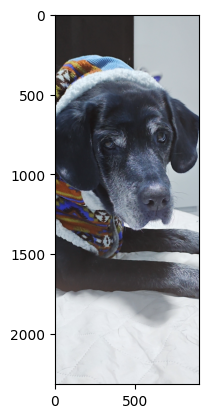

In [3]:

## Read the image in, get the shape of the image, transform to RGB, plot the image
fs='shanti/Screenshot_20250127_114519_Gallery.jpg'
img = cv2.imread(fs, 1)
print(img.shape)
plt.imshow(img)

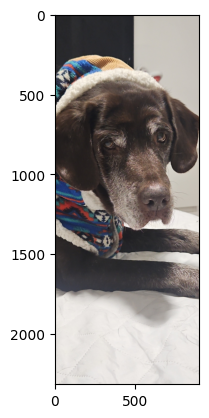

In [4]:
### Convert to RGB
img_transform=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_transform)

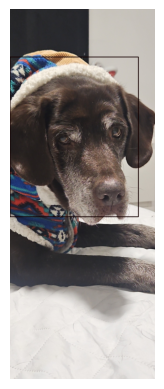

In [5]:
height, width, _ = img.shape
# Bounding box in pixels
# in my image draw the object in this position
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
cv2.rectangle(img_transform, (x_start , y_start ), (x_end, y_end), (20,0,0), 4)
plt.imshow(img_transform)
plt.axis('off')
plt.show()

In [6]:
### calculate the normalized coordinates for YOLO:
fs='shanti/Screenshot_20250127_114519_Gallery.jpg'
img = cv2.imread(fs, 1)
print(img.shape)
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
height, width, _ = img.shape
# Calculate center (in pixels)
center_x = (x_start + x_end) / 2
center_y = (y_start + y_end) / 2
# Calculate width and height (in pixels)
bbox_width = x_end - x_start
bbox_height = y_end - y_start
# Normalize by image dimensions
normalized_center_x = center_x / width
normalized_center_y = center_y / height
normalized_bbox_width = bbox_width / width
normalized_bbox_height = bbox_height / height
# Create the YOLO format label (class ID 0, for example)
class_id = 0
label = f"{class_id} {normalized_center_x} {normalized_center_y} {normalized_bbox_width} {normalized_bbox_height}"
print(label)

(2316, 904, 3)
0 0.4424778761061947 0.3454231433506045 0.8849557522123894 0.4317789291882556


In [7]:
class_id = 0  # Object class (just for reference)
normalized_x_center = normalized_center_x
normalized_y_center = normalized_center_y
normalized_width =    normalized_bbox_width
normalized_height = normalized_bbox_height 

# Image dimensions
image_height = img.shape[0]  # Height of the image (number of rows)
image_width = img.shape[1] # Width of the image (number of columns)

# Reverse the normalization process
x_center = normalized_x_center * image_width
y_center = normalized_y_center * image_height
box_width = normalized_width * image_width
box_height = normalized_height * image_height
# Calculate the top-left corner of the bounding box
top_left_x = int(x_center - (box_width / 2))
top_left_y = int(y_center - (box_height / 2))
# (top_left_x, top_left_y) is the top-left corner, and (box_width, box_height) is the size
bottom_right_x = top_left_x + int(box_width)
bottom_right_y = top_left_y + int(box_height)
bottom_right_x

print("The Original Points to plot were:")
print("x_start", x_start)
print("x_end", x_end)
print("y_start", y_start)
print("y_end", y_end)
print("Now comparing the transformed points:")
print("transformed_x_start", top_left_x)
print("transformed_x_end", bottom_right_x)
print("transformed_y_start", top_left_y)
print("transformed_y_end", bottom_right_y)

The Original Points to plot were:
x_start 0
x_end 800
y_start 300
y_end 1300
Now comparing the transformed points:
transformed_x_start 0
transformed_x_end 800
transformed_y_start 300
transformed_y_end 1300


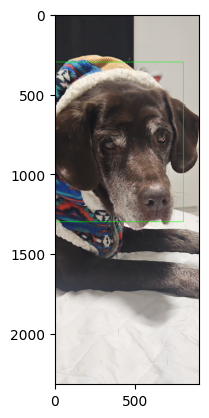

In [8]:
# Draw the rectangle on the image (BGR format, color is green (0, 255, 0))
cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
# Display the image with the bounding box
img_transform=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_transform)

In [9]:
# Initialize the ImageTransformation class with a sample image and bounding box
img_path = 'shanti/Screenshot_20250127_114519_Gallery.jpg'
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
img_class = 0  # Class ID for the object

In [24]:
img_path.split('/')
img_path.split('/')[-1]
img_path.split('/')[-1].split('.')
img_path.split('/')[-1].split('.')[0]
f'{img_path.split("/")[-1].split(".")[0]}_0.txt'
# But we want this 
a=f"{img_path.split('/')[-1].split('.')[0]}.txt"
my_test_files= f"test_yolo_formats_labels/{a}"
my_test_files



'test_yolo_formats_labels/Screenshot_20250127_114519_Gallery.txt'

In [59]:
class ImageTransformation_jm:
    def __init__(self, img_path, x_start, x_end, y_start, y_end, img_class):
        self.img_path = img_path
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end
        self.img_class = img_class
        self.img = cv2.imread(img_path)
        self.height, self.width, _ = self.img.shape
    # Function 1: Load image and display its shape and content
    def display_image(self):
        print(f"Image shape: {self.img.shape}")
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()
    def convert_to_yolo_format(self, save_to_txt=False):
        # Calculate center and size of the bounding box in pixels
        center_x = (self.x_start + self.x_end) / 2
        center_y = (self.y_start + self.y_end) / 2
        bbox_width = self.x_end - self.x_start
        bbox_height = self.y_end - self.y_start
        # Normalize the coordinates by image dimensions
        normalized_center_x = center_x / self.width
        normalized_center_y = center_y / self.height
        normalized_bbox_width = bbox_width / self.width
        normalized_bbox_height = bbox_height / self.height
        # YOLO label format (class_id followed by normalized values)
        label = f"{self.img_class} {normalized_center_x} {normalized_center_y} {normalized_bbox_width} {normalized_bbox_height}"
        print(f"YOLO format label: {label}")
        # Optionally, save the label to a .txt file
        if save_to_txt:
            #label_file = f"{self.img_path.split('/')[-1].split('.')[0]}_{self.img_class}.txt"
            a=f"{img_path.split('/')[-1].split('.')[0]}.txt"
            label_file =f"test_yolo_formats_labels/{a}"
            with open(label_file, 'w') as f:
                f.write(label)
            print(f"Label saved to {label_file}")
        return label
    
        # Function 3: Reverse the normalization and return original bounding box coordinates
    def reverse_transformation(self, normalized_values):
        # Expect normalized values as a list of floats directly
        class_id, normalized_center_x, normalized_center_y, normalized_bbox_width, normalized_bbox_height = normalized_values
        # Convert back to pixel coordinates
        x_center = normalized_center_x * self.width
        y_center = normalized_center_y * self.height
        box_width = normalized_bbox_width * self.width
        box_height = normalized_bbox_height * self.height
        # Calculate top-left corner of the bounding box
        x_start_reversed = int(x_center - (box_width / 2))
        y_start_reversed = int(y_center - (box_height / 2))
        x_end_reversed = int(x_start_reversed + box_width)
        y_end_reversed = int(y_start_reversed + box_height)
        print('transformation has been reversed')
        print(x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed)
        return x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed
    

    def compare_coordinates(self, original_coords, transformed_coords):
        print("Original Coordinates:")
        print(f"x_start: {self.x_start}, x_end: {self.x_end}, y_start: {self.y_start}, y_end: {self.y_end}")
        
        print("Transformed Coordinates:")
        print(f"x_start: {transformed_coords[0]}, x_end: {transformed_coords[1]}, y_start: {transformed_coords[2]}, y_end: {transformed_coords[3]}")
        
        # Check if the coordinates match (allow for small floating point errors)
        if np.isclose([self.x_start, self.x_end, self.y_start, self.y_end], transformed_coords).all():
            print("The transformed coordinates match the original coordinates.")
        else:
            print("The transformed coordinates do NOT match the original coordinates.")
            
            
    def draw_bounding_box_reverse_coords(self, x_start, x_end, y_start,y_end):
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        cv2.rectangle(img_transform, (x_start, y_start), (x_end, y_end), (0, 255, 0), 6)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()

Image shape: (2316, 904, 3)


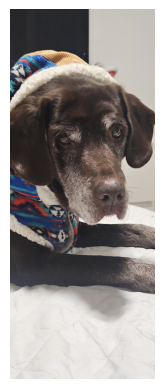

YOLO format label: 0 0.4424778761061947 0.3454231433506045 0.8849557522123894 0.4317789291882556
['0', '0.4424778761061947', '0.3454231433506045', '0.8849557522123894', '0.4317789291882556']
transformation has been reversed
0 800 300 1300
Original Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
Transformed Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
The transformed coordinates match the original coordinates.
(0, 800, 300, 1300)


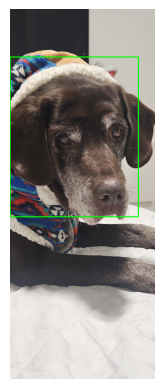

In [60]:
# Initialize the ImageTransformation class with a sample image and bounding box
img_path = 'shanti/Screenshot_20250127_114519_Gallery.jpg'
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
img_class = 0  # Class ID for the object
ts=ImageTransformation_jm(img_path, x_start, x_end, y_start, y_end, img_class)
ts.display_image()
#ts.convert_to_yolo_format(save_to_txt=True)
yolo_label = ts.convert_to_yolo_format(save_to_txt=False)
yolo_label
print(yolo_label.split(" "))
normalized_values = list(map(float, yolo_label.split(" "))) 
normalized_values 
reversed_coords = ts.reverse_transformation(normalized_values)
reversed_coords

ts.compare_coordinates((x_start, x_end, y_start, y_end), reversed_coords)

print(reversed_coords)
list(reversed_coords)
ts.draw_bounding_box_reverse_coords(*reversed_coords)



Image shape: (2316, 904, 3)


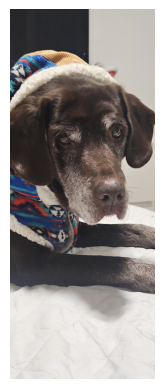

YOLO format label: 0 0.442478 0.345423 0.884956 0.431779
YOLO Label: 0 0.442478 0.345423 0.884956 0.431779
Normalized Values: [0.0, 0.442478, 0.345423, 0.884956, 0.431779]
Reversed transformation coordinates:
0 800 300 1300
Reversed Coordinates: (0, 800, 300, 1300)
Original Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
Transformed Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
Differences: [0 0 0 0]
✅ The transformed coordinates match the original coordinates.


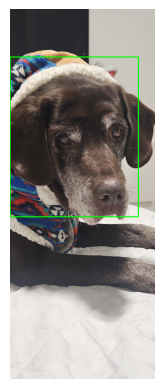

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageTransformation_jm:
    def __init__(self, img_path, x_start, x_end, y_start, y_end, img_class):
        self.img_path = img_path
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end
        self.img_class = img_class
        
        # Load image
        self.img = cv2.imread(img_path)
        if self.img is None:
            raise ValueError(f"Failed to load image from {img_path}")
        
        self.height, self.width, _ = self.img.shape

    def display_image(self):
        """Display the image."""
        print(f"Image shape: {self.img.shape}")
        img_rgb = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

    def convert_to_yolo_format(self, save_to_txt=False):
        """Convert bounding box to YOLO format and optionally save to file."""
        # Compute bounding box center and size
        center_x = (self.x_start + self.x_end) / 2
        center_y = (self.y_start + self.y_end) / 2
        bbox_width = self.x_end - self.x_start
        bbox_height = self.y_end - self.y_start
        
        # Normalize values
        normalized_center_x = center_x / self.width
        normalized_center_y = center_y / self.height
        normalized_bbox_width = bbox_width / self.width
        normalized_bbox_height = bbox_height / self.height
        
        # Create YOLO format label
        label = f"{self.img_class} {normalized_center_x:.6f} {normalized_center_y:.6f} {normalized_bbox_width:.6f} {normalized_bbox_height:.6f}"
        print(f"YOLO format label: {label}")

        # Save label if needed
        if save_to_txt:
            label_file = f"test_yolo_formats_labels/{self.img_path.split('/')[-1].split('.')[0]}.txt"
            with open(label_file, 'w') as f:
                f.write(label)
            print(f"Label saved to {label_file}")

        return label

    def reverse_transformation(self, normalized_values):
        """Convert YOLO format values back to original bounding box coordinates."""
        class_id, normalized_center_x, normalized_center_y, normalized_bbox_width, normalized_bbox_height = normalized_values
        
        # Convert back to pixel coordinates
        x_center = normalized_center_x * self.width
        y_center = normalized_center_y * self.height
        box_width = normalized_bbox_width * self.width
        box_height = normalized_bbox_height * self.height
        
        # Compute top-left and bottom-right coordinates
        x_start_reversed = round(x_center - (box_width / 2))
        y_start_reversed = round(y_center - (box_height / 2))
        x_end_reversed = round(x_start_reversed + box_width)
        y_end_reversed = round(y_start_reversed + box_height)
        
        print("Reversed transformation coordinates:")
        print(x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed)
        
        return x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed

    def compare_coordinates(self, original_coords, transformed_coords):
        """Compare original and reversed bounding box coordinates."""
        print("Original Coordinates:")
        print(f"x_start: {original_coords[0]}, x_end: {original_coords[1]}, y_start: {original_coords[2]}, y_end: {original_coords[3]}")
        
        print("Transformed Coordinates:")
        print(f"x_start: {transformed_coords[0]}, x_end: {transformed_coords[1]}, y_start: {transformed_coords[2]}, y_end: {transformed_coords[3]}")

        # Check if the coordinates match within a small margin
        diffs = np.abs(np.array(original_coords) - np.array(transformed_coords))
        print(f"Differences: {diffs}")

        if np.allclose(original_coords, transformed_coords, atol=2):  # Allow a small difference of 2 pixels
            print("✅ The transformed coordinates match the original coordinates.")
        else:
            print("❌ The transformed coordinates do NOT match the original coordinates.")

    def draw_bounding_box_reverse_coords(self, x_start,x_end,y_start, y_end):
        """Draw the bounding box on the image."""
        img_copy = self.img.copy()  # Copy image to avoid modifying original
        cv2.rectangle(img_copy, (x_start, y_start), (x_end, y_end), (0, 255, 0), 6)
        img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

# Initialize with sample values
img_path = 'shanti/Screenshot_20250127_114519_Gallery.jpg'
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
img_class = 0  # Class ID for the object

# Create an instance of the class
ts = ImageTransformation_jm(img_path, x_start, x_end, y_start, y_end, img_class)

# Display the image
ts.display_image()

# Convert to YOLO format and print the label
yolo_label = ts.convert_to_yolo_format(save_to_txt=False)
print("YOLO Label:", yolo_label)

# Split the label and normalize values
normalized_values = list(map(float, yolo_label.split(" ")))
print("Normalized Values:", normalized_values)

# Reverse the transformation
reversed_coords = ts.reverse_transformation(normalized_values)
print("Reversed Coordinates:", reversed_coords)

# Compare original and transformed coordinates
ts.compare_coordinates((x_start, x_end, y_start, y_end), reversed_coords)

# Draw the bounding box using reversed coordinates
ts.draw_bounding_box_reverse_coords(*reversed_coords)
